In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1

In [2]:
dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dfr_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[130], ascending=False)
dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[130], ascending=False)
dfr_g = dfr_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfr_graw.columns[130], ascending=False)

In [4]:
dfc_g = dfc_g.loc[:,dfc_g.columns[56:127]]
dfd_g = dfd_g.loc[:,dfd_g.columns[56:127]]
dfr_g = dfr_g.loc[:,dfr_g.columns[56:127]]

In [5]:
dfc_g['c_rank'] = [i+1 for i in range(len(dfc_g.index))]
dfd_g['d_rank'] = [i+1 for i in range(len(dfd_g.index))]
dfr_g['r_rank'] = [i+1 for i in range(len(dfr_g.index))]

### 2

In [6]:
dfc_graw14 = pd.read_csv('confirm_increase_count_14.csv',index_col = 0)
dfc_grawr14 = pd.read_csv('confirm_increase_rate_14.csv',index_col = 0)
dfd_graw14 = pd.read_csv('death_increase_count_14.csv',index_col = 0)
dfd_grawr14 = pd.read_csv('death_increase_rate_14.csv',index_col = 0)
dfr_graw14 = pd.read_csv('recover_increase_count_14.csv',index_col = 0)
dfr_grawr14 = pd.read_csv('recover_increase_rate_14.csv',index_col = 0)

In [7]:
dfc_graw14 = dfc_graw14.loc[:,dfc_graw14.columns[4:9]]
dfc_grawr14 = dfc_grawr14.loc[:,dfc_grawr14.columns[4:9]]
dfd_graw14 = dfd_graw14.loc[:,dfd_graw14.columns[4:9]]
dfd_grawr14 = dfd_grawr14.loc[:,dfd_grawr14.columns[4:9]]
dfr_graw14 = dfr_graw14.loc[:,dfr_graw14.columns[4:9]]
dfr_grawr14 = dfr_grawr14.loc[:,dfr_grawr14.columns[4:9]]

In [8]:
dfc_graw14.columns = ['1','2','3','4','5']
dfc_grawr14.columns = ['1','2','3','4','5']
dfd_graw14.columns = ['1','2','3','4','5']
dfd_grawr14.columns = ['1','2','3','4','5']
dfr_graw14.columns = ['1','2','3','4','5']
dfr_grawr14.columns = ['1','2','3','4','5']

In [9]:
# rename
dfc_graw14 = dfc_graw14.add_prefix('c_count_')
dfc_grawr14 = dfc_grawr14.add_prefix('c_rate_')
dfd_graw14 = dfd_graw14.add_prefix('d_count_')
dfd_grawr14 = dfd_grawr14.add_prefix('d_rate_')
dfr_graw14 = dfr_graw14.add_prefix('r_count_')
dfr_grawr14 = dfr_grawr14.add_prefix('r_rate_')

### 3

In [10]:
df_other = pd.read_csv('Covid.csv',index_col = 0)
df_other.rename(index={'Congo(Brazzaville)': 'Congo (Brazzaville)',
                       'Congo(Kinshasa)':'Congo (Kinshasa)',
                       'Korea,South':'Korea, South'
                      }, inplace=True)
df_other.drop('Western Sahara' , inplace=True)

In [11]:
df_other.rename(columns={'Day': 'start_day'}, inplace=True)

In [12]:
dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfc_graw = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[134], ascending=False)

In [13]:
df_test = dfc_graw.loc[df_other.index]

In [14]:
add = []
for u in df_other.index:
    add.append((df_test.loc[u].values / (df_other['Population(ten thousand)'].loc[u] / 100)>10).argmax() + 1)
df_other['Outbreak'] = add

In [15]:
df_other['Outbreak'] = df_other['Outbreak'] - df_other['start_day']

In [16]:
for u in df_other.index:
    if df_other.loc[u,['Outbreak']].values[0] < 0:
        df_other.loc[u,['Outbreak']] = 0

### 4

In [17]:
# no china 暫時不用
df_mobility = pd.read_csv('6_month_mean.csv')

In [18]:
mask = (df_mobility['sub_region_1'] == '0') & (df_mobility['date'] == '2020-04-30')
mask2 = (df_mobility['sub_region_1'] == '0') & (df_mobility['date'] == '2020-05-31')
df_mobility_m4 = df_mobility[mask].set_index('country_region')
df_mobility_m5 = df_mobility[mask2].set_index('country_region')

In [19]:
df_mobility_m4.rename(index={'Cape Verde': 'Cabo Verde',
                       "Côte d'Ivoire":"Cote d'Ivoire",
                       'Myanmar (Burma)':'Burma',
                        'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'The Bahamas':'Bahamas',
                        'United States':'US'
                      }, inplace=True)
df_mobility_m5.rename(index={'Cape Verde': 'Cabo Verde',
                       "Côte d'Ivoire":"Cote d'Ivoire",
                       'Myanmar (Burma)':'Burma',
                        'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'The Bahamas':'Bahamas',
                        'United States':'US'
                      }, inplace=True)
df_mobility_m4.drop('Aruba' , inplace=True)
df_mobility_m4.drop('Hong Kong' , inplace=True)
df_mobility_m4.drop('Puerto Rico' , inplace=True)
df_mobility_m4.drop('Réunion' , inplace=True)
df_mobility_m5.drop('Aruba' , inplace=True)
df_mobility_m5.drop('Hong Kong' , inplace=True)
df_mobility_m5.drop('Puerto Rico' , inplace=True)
df_mobility_m5.drop('Réunion' , inplace=True)

In [20]:
df_mobility_m4 = df_mobility_m4.drop(columns=['sub_region_1','sub_region_2','date'])
df_mobility_m5 = df_mobility_m5.drop(columns=['sub_region_1','sub_region_2','date'])

### 5

In [22]:
df_tpt = pd.read_csv('full-list-cumulative-total-tests-per-thousand-map _30.csv')

In [23]:
mask = (df_tpt['Date'] == '2020-04-30') & (df_tpt['Code'] != '0')
mask2 = (df_tpt['Date'] == '2020-05-31') & (df_tpt['Code'] != '0')
df_tpt4 = df_tpt[mask].set_index('Entity')
df_tpt5 = df_tpt[mask2].set_index('Entity')

In [24]:
df_tpt4.rename(index={'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'United States':'US'
                      }, inplace=True)
df_tpt5.rename(index={'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'United States':'US'
                      }, inplace=True)
df_tpt4.drop('Hong Kong' , inplace=True)
df_tpt5.drop('Hong Kong' , inplace=True)

In [25]:
df_tpt4 = df_tpt4['total_tests_per_thousand']
df_tpt5 = df_tpt5['total_tests_per_thousand']

In [26]:
df_tpc = pd.read_csv('tests-per-confirmed-case-daily-smoothed _30.csv')

In [27]:
mask = (df_tpc['Date'] == '2020-04-30') & (df_tpc['Code'] != '0')
mask2 = (df_tpc['Date'] == '2020-05-31') & (df_tpc['Code'] != '0')
df_tpc4 = df_tpc[mask].set_index('Entity')
df_tpc5 = df_tpc[mask2].set_index('Entity')

In [28]:
df_tpc4.rename(index={'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'United States':'US'
                      }, inplace=True)
df_tpc5.rename(index={'South Korea':'Korea, South',
                        'Taiwan':'Taiwan*',
                        'United States':'US'
                      }, inplace=True)

In [29]:
df_tpc4 = df_tpc4['short_term_tests_per_case']
df_tpc5 = df_tpc5['short_term_tests_per_case']

### all data

In [30]:
result = pd.concat([df_other,dfc_graw14.loc[df_other.index]], axis=1).reindex(df_other.index)
for i in dfc_graw14.columns:
    result[i] = result[i] / (result['Population(ten thousand)'] / 100)
result = pd.concat([result,dfd_graw14.loc[result.index]], axis=1).reindex(result.index)
for i in dfd_graw14.columns:
    result[i] = result[i] / (result['Population(ten thousand)'] / 100)

In [ ]:
'''
result = pd.concat([result,dfr_graw14.loc[result.index]], axis=1).reindex(result.index)
for i in dfr_graw14.columns:
    result[i] = result[i] / (result['Population(ten thousand)'] / 100)
result = pd.concat([result,dfr_grawr14.loc[result.index]], axis=1).reindex(result.index)
'''

In [31]:
result = pd.concat([result,dfc_grawr14.loc[result.index]], axis=1).reindex(result.index)
result = pd.concat([result,dfd_grawr14.loc[result.index]], axis=1).reindex(result.index)

In [32]:
df_death_rate = pd.read_csv('death_rate_14.csv').set_index('Country/Region')

In [33]:
result['death_rate'] = df_death_rate.loc[df_other.index]['5/27/20']

In [34]:
result = result.drop(index = dfc_g[dfc_g['5/27/20']<100].index[:25])
result = result.drop(index = dfc_g[dfc_g['5/27/20']<100].index[26:])
result = result[result['Population(ten thousand)']>100]

In [43]:
maskr = list(set(result.index) & set(df_mobility_m5.index))

In [47]:
result = result.loc[maskr]
df_mobility_m5 = df_mobility_m5.loc[maskr]
result = pd.concat([result,df_mobility_m5], axis=1).reindex(result.index)

In [52]:
result

,Population(ten thousand),Density(per square kilometer),GDP(Billion),Temperature(Cel),start_day,Outbreak,c_count_1,c_count_2,c_count_3,c_count_4,...,d_rate_1,d_rate_2,d_rate_3,d_rate_4,d_rate_5,death_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Country,,,,,,,,,,,,,,,,,,,,,
Paraguay,696,17,17,28,47,25,8.333333,13.218391,11.206897,71.982759,...,0.000000,1.666667,0.125000,0.222222,0.000000,0.012443,-44.354839,-28.225806,-21.709677,18.258065
Latvia,192,32,32,3,41,12,195.312500,114.583333,95.312500,53.125000,...,0.000000,0.000000,2.000000,0.266667,0.210526,0.021760,-16.645161,-0.225806,-26.612903,6.354839
Norway,537,14,14,2,36,7,616.945996,349.534451,180.633147,86.592179,...,6.333333,2.409091,0.380000,0.106280,0.026201,0.027973,-15.645161,3.903226,-26.354839,7.064516
Kuwait,413,207,207,18,34,3,42.372881,263.438257,565.375303,1764.648910,...,0.000000,0.000000,7.000000,2.416667,1.134146,0.007521,-79.612903,-63.258065,-69.209677,36.532258
Iraq,3843,87,87,13,34,32,14.676034,17.876659,15.300546,26.775956,...,3.333333,0.519231,0.164557,0.250000,0.521739,0.034080,-30.193548,-6.000000,-20.419355,13.096774
Canada,3759,4,4,-9,5,50,236.844906,496.115988,655.919127,550.758180,...,12.625000,8.247706,2.129960,0.719493,0.267465,0.077268,-37.580645,-10.387097,-43.322581,16.129032
Bulgaria,700,64,64,3,47,10,47.142857,46.428571,100.000000,88.857143,...,4.000000,2.600000,0.777778,0.500000,0.385417,0.054065,-26.548387,-8.225806,-25.806452,6.612903
Indonesia,26770,140,140,27,40,37,5.416511,12.921180,17.314158,21.169219,...,7.263158,1.987261,0.671642,0.311224,0.432879,0.061758,-37.806452,-12.483871,-34.387097,17.032258
Russia,14450,8,8,-25,10,58,18.200692,150.262976,518.401384,988.733564,...,0.000000,7.250000,3.909091,1.275720,0.793852,0.010705,-38.296015,-12.696395,-36.174573,6.918406


In [53]:
# Scaling / Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
result_norm = pd.DataFrame(scaler.fit_transform(result), index=result.index, columns=result.columns)
result_norm

,Population(ten thousand),Density(per square kilometer),GDP(Billion),Temperature(Cel),start_day,Outbreak,c_count_1,c_count_2,c_count_3,c_count_4,...,d_rate_1,d_rate_2,d_rate_3,d_rate_4,d_rate_5,death_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Country,,,,,,,,,,,,,,,,,,,,,
Paraguay,-0.302184,-0.283300,-0.283300,1.170775,0.527492,-0.255434,-0.489923,-0.597260,-0.542169,-0.335559,...,-0.344601,-0.434374,-0.839979,-0.588273,-0.696334,-0.675659,-0.143304,-0.496091,0.673118,0.327950
Latvia,-0.339939,-0.263129,-0.263129,-0.971337,0.199401,-0.676873,0.078768,-0.329210,-0.356270,-0.367851,...,-0.344601,-1.059384,1.017858,-0.507204,-0.311690,-0.434074,1.297267,1.111086,0.347539,-1.163146
Norway,-0.314094,-0.287334,-0.287334,-1.057021,-0.074009,-0.838965,1.361152,0.292098,-0.167686,-0.310542,...,-0.129161,-0.155961,-0.587313,-0.799756,-0.648463,-0.272958,1.349255,1.348090,0.364675,-1.074246
Kuwait,-0.323383,-0.027799,-0.027799,0.313930,-0.183373,-0.968638,-0.386393,0.064424,0.682709,2.562958,...,-0.344601,-1.059384,5.972090,3.414496,1.375819,-0.803295,-1.976301,-2.506914,-2.480926,2.617125
Iraq,-0.066440,-0.189168,-0.189168,-0.114492,-0.183373,-0.028506,-0.470632,-0.584942,-0.533120,-0.412971,...,-0.231212,-0.864670,-0.800784,-0.537605,0.256915,-0.114595,0.592914,0.779652,0.758797,-0.318595
Canada,-0.072732,-0.300782,-0.300782,-1.999550,-1.769149,0.555025,0.205087,0.679720,0.882837,0.484295,...,0.084861,2.033554,1.146629,0.318772,-0.207659,1.005338,0.208873,0.527837,-0.761999,0.061250
Bulgaria,-0.301884,-0.220097,-0.220097,-0.971337,0.527492,-0.741710,-0.371885,-0.509439,-0.345909,-0.306663,...,-0.208534,-0.084369,-0.193176,-0.081593,0.007845,0.403651,0.782418,0.651893,0.401088,-1.130818
Indonesia,1.651036,-0.117897,-0.117897,1.085090,0.144719,0.133586,-0.498794,-0.598046,-0.528670,-0.422572,...,-0.097531,-0.314150,-0.298341,-0.425928,0.094563,0.603152,0.197134,0.407484,-0.168674,0.174396
Russia,0.728137,-0.295403,-0.295403,-3.370501,-1.495739,0.814372,-0.459912,-0.234858,0.578882,1.234283,...,-0.344601,1.659409,2.909474,1.333357,0.754081,-0.720748,0.171682,0.395285,-0.287364,-1.092548


### DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
df_train = result_norm.copy()
clustering = DBSCAN(eps=3, min_samples = 2).fit(df_train)#, metric='precomputed'
labels = clustering.labels_

In [55]:
df_train.insert(0, 'c_labels',clustering.labels_)
df_train[df_train.index.isin(
    ['Japan','US','Italy','Spain','India','Taiwan*','United Kingdom','Korea, South'])]

,c_labels,Population(ten thousand),Density(per square kilometer),GDP(Billion),Temperature(Cel),start_day,Outbreak,c_count_1,c_count_2,c_count_3,...,d_rate_1,d_rate_2,d_rate_3,d_rate_4,d_rate_5,death_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Country,,,,,,,,,,,,,,,,,,,,,
United Kingdom,-1,0.144958,0.052885,0.052885,-0.799968,-1.495739,0.198423,1.233495,1.894200,1.633145,...,0.531405,0.365039,-0.231602,-0.532681,-0.474192,2.776017,-1.414495,-0.155399,-1.541674,0.610814
US,-1,2.104246,-0.261784,-0.261784,-1.142705,-1.987877,0.684698,1.480127,2.815681,2.117260,...,0.779195,0.540488,-0.123422,-0.318887,-0.348296,0.576726,0.752232,0.888896,-0.327180,-0.306473
India,-1,9.781088,0.246528,0.246528,0.313930,-1.550421,1.462739,-0.511128,-0.612037,-0.533058,...,0.279041,1.184186,0.685130,1.494796,0.723917,-0.254605,-1.793504,-0.360925,-0.804838,0.780532
Spain,-1,-0.002691,-0.182444,-0.182444,-0.971337,-1.441058,0.068749,5.329739,3.509946,1.093986,...,0.133928,-0.687015,-0.668985,-0.781042,-0.695458,1.977993,-1.308842,-0.560896,-1.021176,0.412809
Italy,-1,0.097839,-0.035868,-0.035868,-0.542914,-1.495739,-0.190598,3.256886,1.759015,0.840533,...,-0.228352,-0.817362,-0.687478,-0.767999,-0.580858,2.712013,-0.552500,-0.497942,-0.348599,0.032964
Taiwan*,0,-0.177757,0.569266,0.569266,0.485299,-1.987877,1.008882,-0.485718,-0.624810,-0.563751,...,-0.208534,-0.984383,-0.963834,-0.689608,-0.696334,-0.586725,1.594102,1.298097,2.208907,-1.615727
Japan,0,0.593298,0.141638,0.141638,-0.457230,-1.987877,0.976463,-0.476631,-0.500517,-0.475365,...,-0.302080,-0.465625,0.463837,0.099205,-0.333942,0.366645,0.614715,1.005546,0.345397,-0.233736
"Korea, South",0,0.032517,0.387726,0.387726,-1.142705,-1.987877,-0.028506,-0.428454,-0.596164,-0.559492,...,-0.311799,-0.923018,-0.866952,-0.897614,-0.633089,-0.383423,1.849011,1.749884,1.647712,-1.464193


In [56]:
df_train[['c_labels','Population(ten thousand)']].groupby(by=['c_labels']).count().rename(columns={'Cases':'Count'})

,Population(ten thousand)
c_labels,
-1,41
0,73
1,2


### T-SNE Method (T-Distributed Stochastic Neighbor Embedding)

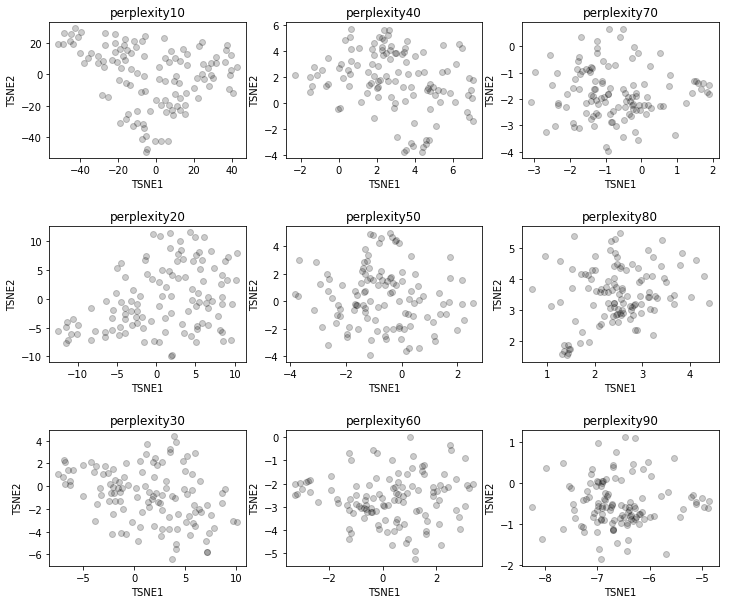

In [57]:
from sklearn.manifold import TSNE
plotX = result_norm.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3, 3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math 

for i, perplexity in enumerate(ps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsneComponents = tsne.fit_transform(plotX)
    TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

    ax[i%3][math.floor(i/3)].set_title('perplexity' + str(perplexity))
    ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

In [84]:
tsne = TSNE(n_components=2, perplexity=30)
tsneComponents = tsne.fit_transform(plotX)
TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)
TSNE_components.head()

,0,1
Country,,
Paraguay,-3.283058,-9.324759
Latvia,-6.736064,-10.536688
Norway,-8.841343,-9.223773
Kuwait,-3.479391,-1.538865
Iraq,-5.421758,-9.591970


In [123]:
TSNE_components.to_csv('TSNE.csv')

In [85]:
from matplotlib import colors as mcolors
import random
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

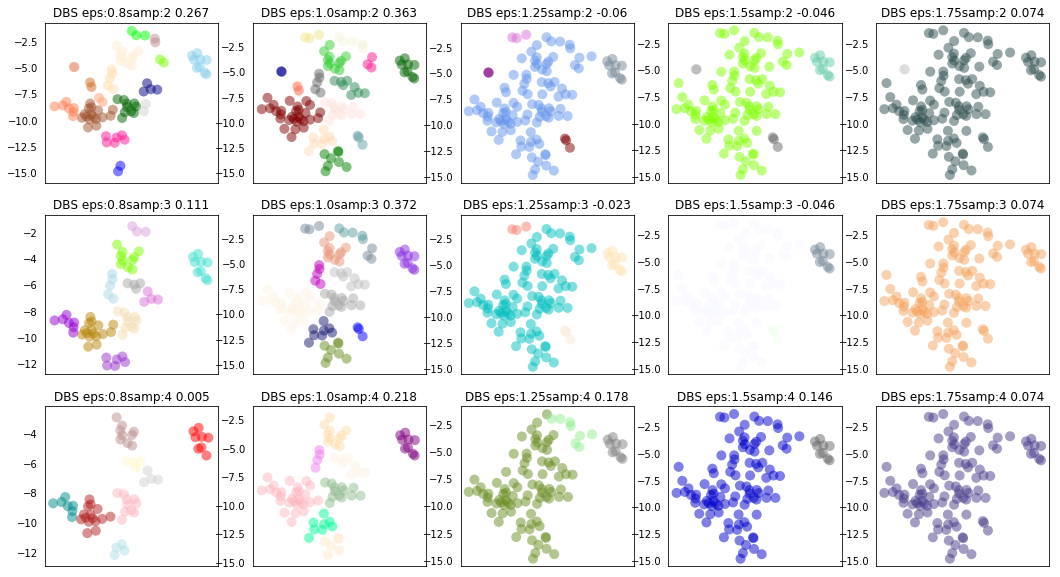

In [86]:
from itertools import product
from math import floor  
from sklearn import metrics
samp_list = [2,3,4]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    s_score = metrics.silhouette_score(TSNE_df, clustering.labels_, metric='euclidean')
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors_i = random.sample(colors.keys(),16)
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors_i,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title('DBS eps:'+str(eps)+'samp:'+str(samp)+' '+str(round(s_score,3)))

In [87]:
def plot_big(clustering_name, reducer_name, model, df_comp, dims=2, countries=30):
    df_comp2 = df_comp.copy()
    fig,ax = plt.subplots(figsize=(18,12))

    m = model.fit(df_comp2)  # first 3 cols, or dims
    df_comp2.insert(0, 'cluster', m.labels_)
    
    datas = []
    for i in range(len(set(m.labels_))):
        tup = []
        for j in range(dims):
            tup.append(df_comp2[df_comp2['cluster']==i][j])
        datas.append(tup)

    groups = [clustering_name+str(i) for i in range(len(set(m.labels_)))]
    colors_i = random.sample(colors.keys(),16)

    for data,color,group in zip(datas,colors_i,groups):
        x,y = data[0],data[1]
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
        ax.set_title(reducer_name+clustering_name+str(len(set(m.labels_))) +'clusters')
        ax.set(xlabel= reducer_name+'1')
        ax.set(ylabel= reducer_name+'2')

    for index,row in df_comp2[df_comp2.index.isin(
        ['United Kingdom','Belgium','Canada', 'France', 'Germany', 'Italy', 
         'Netherlands', 'Sweden', 'Spain','New Zealand','Japan','US',
         'China','Australia','Singapore','South Africa','Korea, South','Brazil','Russia','India',
         'Taiwan*'])].iterrows():
        ax.annotate(index, (row[0],row[1]))
    for index,row in df_comp2.sample(countries).iterrows():
        ax.annotate(index, (row[0],row[1]))

    plt.legend(loc=0)
    plt.show()

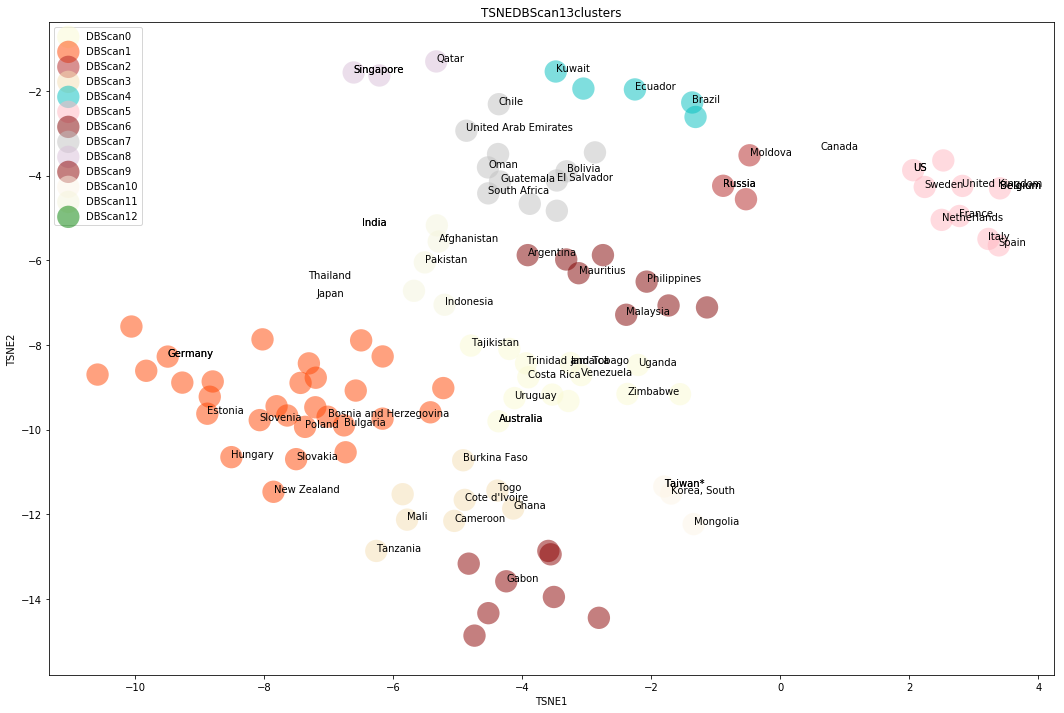

In [103]:
TSNE_df = TSNE_components.copy()
clustering = DBSCAN(eps=1, min_samples=3).fit(TSNE_df)
labels = clustering.labels_
plot_big('DBScan','TSNE',clustering, TSNE_df, countries=50)

In [104]:
TSNE_df1 = TSNE_df.copy()
TSNE_df1.insert(0, 'c_labels',clustering.labels_)

In [105]:
TSNE_df1[['c_labels',0]].groupby(by=['c_labels']).count().rename(columns={'Cases':'Count'})

,0
c_labels,
-1,11
0,13
1,29
2,3
3,8
4,5
5,9
6,8
7,11


In [106]:
TSNE_df1[TSNE_df1['c_labels']==-1] 

,c_labels,0,1
Country,,,
Canada,-1,0.630325,-3.387698
Mozambique,-1,-3.266046,-10.733847
Cambodia,-1,-8.754566,-4.973907
Thailand,-1,-7.313330,-6.430264
India,-1,-6.489384,-5.182016
Turkey,-1,-10.387306,-6.251863
Nigeria,-1,-2.114568,-4.709955
Japan,-1,-7.184321,-6.857163
Georgia,-1,-3.866386,-7.061695


In [108]:
for i in range(-1,12):
    print(i)
    print(TSNE_df1[TSNE_df1['c_labels']==i].index)

-1
Index(['Canada', 'Mozambique', 'Cambodia', 'Thailand', 'India', 'Turkey',
       'Nigeria', 'Japan', 'Georgia', 'Bangladesh', 'Vietnam'],
      dtype='object', name='Country')
0
Index(['Paraguay', 'Costa Rica', 'Jordan', 'Uganda', 'Australia',
       'Trinidad and Tobago', 'Venezuela', 'Jamaica', 'Uruguay', 'Rwanda',
       'Burma', 'Tajikistan', 'Zimbabwe'],
      dtype='object', name='Country')
1
Index(['Latvia', 'Norway', 'Iraq', 'Bulgaria', 'Croatia',
       'Bosnia and Herzegovina', 'Greece', 'Portugal', 'Ukraine', 'Romania',
       'Kyrgyzstan', 'Poland', 'Czechia', 'Estonia', 'Finland', 'Israel',
       'Slovenia', 'Germany', 'Lebanon', 'Kazakhstan', 'Austria',
       'North Macedonia', 'Slovakia', 'Serbia', 'Lithuania', 'Hungary',
       'New Zealand', 'Denmark', 'Switzerland'],
      dtype='object', name='Country')
2
Index(['Russia', 'Belarus', 'Moldova'], dtype='object', name='Country')
3
Index(['Cameroon', 'Togo', 'Ghana', 'Tanzania', 'Niger', 'Burkina Faso',
       'Cote

In [109]:
result['c_labels'] = TSNE_df1.loc[result.index]['c_labels']

In [110]:
result['c_rank'] = dfc_g.loc[result.index]['c_rank']
result['d_rank'] = dfd_g.loc[result.index]['d_rank']

In [113]:
avg_result = result.mean(axis = 0)
avg_result = avg_result.to_frame(name="avg")
for i in range(0,12):
    avg_result['c_' + str(i)] = result[result['c_labels'] == i].mean(axis = 0)

In [114]:
avg_result

,avg,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11
Population(ten thousand),4729.922414,1677.923077,1307.620690,5251.333333,2569.250000,7778.000000,6811.222222,3505.125000,2028.272727,333.000000,1184.625000,2612.666667,13337.600000
Density(per square kilometer),227.672414,179.538462,118.034483,57.000000,69.000000,76.400000,178.333333,222.000000,81.363636,3336.666667,90.125000,389.666667,124.800000
GDP(Billion),227.672414,179.538462,118.034483,57.000000,69.000000,76.400000,178.333333,222.000000,81.363636,3336.666667,90.125000,389.666667,124.800000
Temperature(Cel),14.336207,23.000000,3.724138,-7.333333,21.875000,19.000000,4.888889,21.875000,23.363636,23.333333,25.125000,2.000000,15.000000
start_day,37.353448,52.923077,37.724138,31.666667,52.875000,38.600000,14.777778,25.000000,43.090909,24.333333,58.375000,17.000000,37.200000
Outbreak,32.879310,38.230769,17.103448,33.333333,22.000000,19.400000,32.111111,46.500000,21.727273,11.666667,40.875000,45.333333,43.400000
c_count_1,169.414497,32.936128,303.508951,46.902271,5.677851,54.885311,877.551034,46.674610,58.518288,152.980451,3.498988,13.594388,5.356351
c_count_2,239.075941,17.976328,293.324026,327.983244,13.250457,203.585745,1218.431959,64.937374,159.063006,738.329767,7.594790,7.160110,14.055312
c_count_3,256.498999,14.913566,183.696721,666.524322,17.061471,518.366471,932.548228,58.902561,252.616025,2032.695535,28.026139,2.445217,25.239966
c_count_4,267.941227,21.364193,103.790910,927.215595,29.119048,826.822860,534.536800,78.012897,409.454584,2863.890714,102.412996,2.034992,51.666030


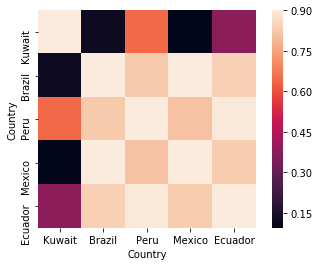

In [115]:
import seaborn as sns
sns.heatmap(result[result['c_labels'] == 4].transpose().corr(), vmax = .9, square = True)

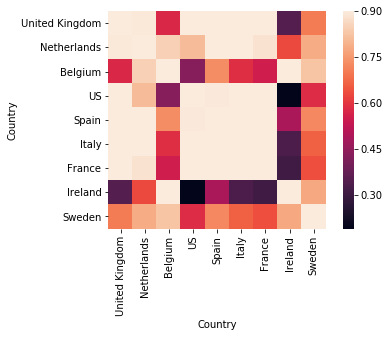

In [116]:
sns.heatmap(result[result['c_labels'] == 5].transpose().corr(), vmax = .9, square = True)

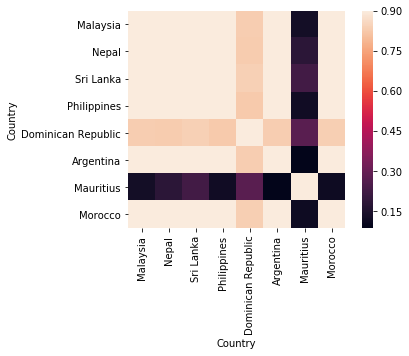

In [117]:
sns.heatmap(result[result['c_labels'] == 6].transpose().corr(), vmax = .9, square = True)

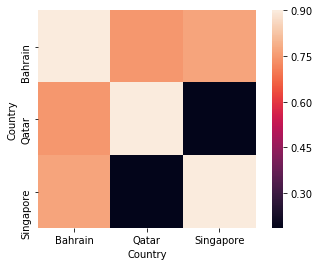

In [119]:
sns.heatmap(result[result['c_labels'] == 8].transpose().corr(), vmax = .9, square = True)

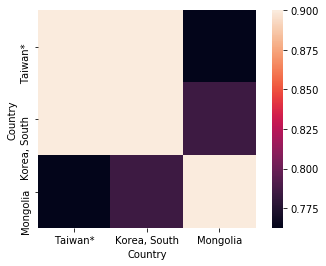

In [121]:
sns.heatmap(result[result['c_labels'] == 10].transpose().corr(), vmax = .9, square = True)

In [125]:
result[result['c_labels'] == 10].transpose().corr()

Country,Taiwan*,"Korea, South",Mongolia
Country,,,
Taiwan*,1.000000,0.971479,0.762592
"Korea, South",0.971479,1.000000,0.784792
Mongolia,0.762592,0.784792,1.000000


In [148]:
# attribute rank
for i in avg_result.transpose().columns:
    rank = avg_result.transpose().sort_values(i, ascending=False)
    print(i)
    print(rank.index)

Population(ten thousand)
Index(['c_11', 'c_4', 'c_5', 'c_2', 'avg', 'c_6', 'c_10', 'c_3', 'c_7', 'c_0',
       'c_1', 'c_9', 'c_8'],
      dtype='object')
Density(per square kilometer)
Index(['c_8', 'c_10', 'avg', 'c_6', 'c_0', 'c_5', 'c_11', 'c_1', 'c_9', 'c_7',
       'c_4', 'c_3', 'c_2'],
      dtype='object')
GDP(Billion)
Index(['c_8', 'c_10', 'avg', 'c_6', 'c_0', 'c_5', 'c_11', 'c_1', 'c_9', 'c_7',
       'c_4', 'c_3', 'c_2'],
      dtype='object')
Temperature(Cel)
Index(['c_9', 'c_7', 'c_8', 'c_0', 'c_3', 'c_6', 'c_4', 'c_11', 'avg', 'c_5',
       'c_1', 'c_10', 'c_2'],
      dtype='object')
start_day
Index(['c_9', 'c_0', 'c_3', 'c_7', 'c_4', 'c_1', 'avg', 'c_11', 'c_2', 'c_6',
       'c_8', 'c_10', 'c_5'],
      dtype='object')
Outbreak
Index(['c_6', 'c_10', 'c_11', 'c_9', 'c_0', 'c_2', 'avg', 'c_5', 'c_3', 'c_7',
       'c_4', 'c_1', 'c_8'],
      dtype='object')
c_count_1
Index(['c_5', 'c_1', 'avg', 'c_8', 'c_7', 'c_4', 'c_2', 'c_6', 'c_0', 'c_10',
       'c_3', 'c_11', 'c_9']

### compare original data

In [152]:
#confirm
ori_c_data = dfc_g.loc[result.index]
ori_c_data['c_rank'] = TSNE_df1.loc[result.index]['c_labels']

In [155]:
ori_c_result = ori_c_data.mean(axis = 0)
ori_c_result = ori_c_result.to_frame(name="avg")
for i in range(0,12):
    ori_c_result['c_' + str(i)] = ori_c_data[ori_c_data['c_rank'] == i].mean(axis = 0)

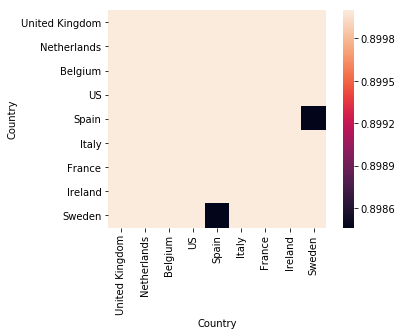

In [162]:
sns.heatmap(ori_c_data[ori_c_data['c_rank'] == 5].transpose().corr(), vmax = .9, square = True)

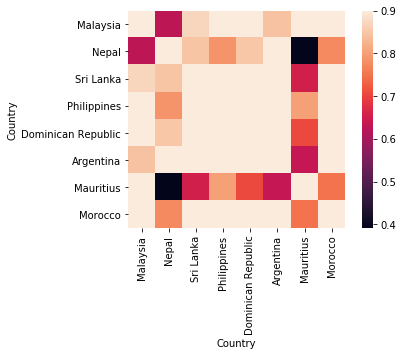

In [163]:
sns.heatmap(ori_c_data[ori_c_data['c_rank'] == 6].transpose().corr(), vmax = .9, square = True)

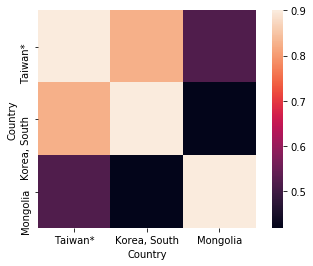

In [165]:
sns.heatmap(ori_c_data[ori_c_data['c_rank'] == 10].transpose().corr(), vmax = .9, square = True)

In [166]:
#death
ori_d_data = dfd_g.loc[result.index]
ori_d_data['d_rank'] = TSNE_df1.loc[result.index]['c_labels']
ori_d_result = ori_d_data.mean(axis = 0)
ori_d_result = ori_d_result.to_frame(name="avg")
for i in range(0,12):
    ori_d_result['c_' + str(i)] = ori_d_data[ori_d_data['d_rank'] == i].mean(axis = 0)

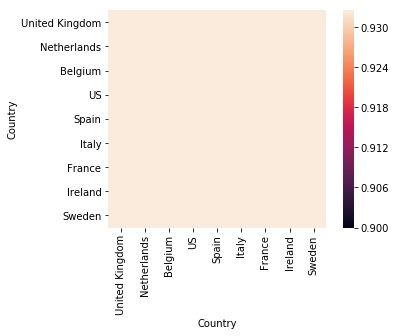

In [169]:
sns.heatmap(ori_d_data[ori_d_data['d_rank'] == 5].transpose().corr(), vmax = .9, square = True)

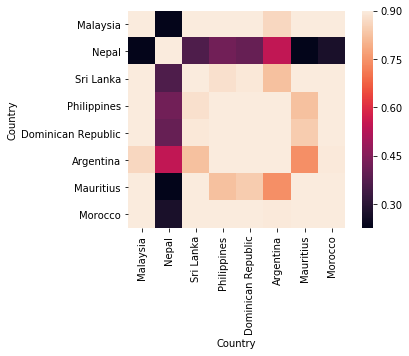

In [170]:
sns.heatmap(ori_d_data[ori_d_data['d_rank'] == 6].transpose().corr(), vmax = .9, square = True)

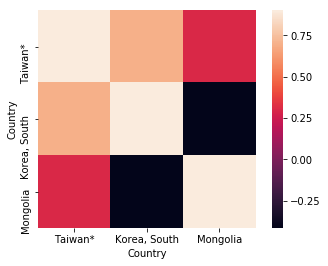

In [172]:
sns.heatmap(ori_d_data[ori_d_data['d_rank'] == 10].transpose().corr(), vmax = .9, square = True)

In [173]:
d_plot = ori_d_result.transpose()

In [175]:
c_plot = ori_c_result.transpose()